In [1]:
# Importing library for pre-processing
import numpy as np
import pandas as pd

In [2]:
# Importing CSV file
yourCabs = pd.read_csv('YourCabs.csv')
pd.set_option('display.precision',2)
yourCabs

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
0,132512,22177,28,NaN,2,83.0,448.0,NaN,NaN,01-01-2013 02:00,0,0,01-01-2013 01:39,12.92,77.67,12.93,77.64,0
1,132513,21413,12,NaN,2,1010.0,540.0,NaN,NaN,01-01-2013 09:00,0,0,01-01-2013 02:25,12.97,77.75,12.93,77.63,0
2,132514,22178,12,NaN,2,1301.0,1034.0,NaN,NaN,01-01-2013 03:30,0,0,01-01-2013 03:08,12.94,77.63,13.05,77.60,0
3,132515,13034,12,NaN,2,768.0,398.0,NaN,NaN,01-01-2013 05:45,0,0,01-01-2013 04:39,12.99,77.55,12.97,77.64,0
4,132517,22180,12,NaN,2,1365.0,849.0,NaN,NaN,01-01-2013 09:00,0,0,01-01-2013 07:53,12.85,77.68,12.95,77.60,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43426,185937,14364,12,NaN,2,1147.0,452.0,15.0,NaN,11/24/2013 18:00,1,0,11/24/2013 14:25,13.03,77.65,12.95,77.59,0
43427,185938,48727,12,NaN,2,393.0,466.0,15.0,NaN,11/26/2013 1:00,1,0,11/24/2013 14:30,13.20,77.71,13.02,77.64,0
43428,185939,48729,12,1.0,3,974.0,NaN,15.0,NaN,11/24/2013 18:30,0,0,11/24/2013 14:35,13.08,77.56,NaN,NaN,0
43429,185940,30724,87,NaN,2,1263.0,542.0,15.0,NaN,11/24/2013 16:00,0,0,11/24/2013 14:43,12.97,77.59,12.94,77.62,0


In [3]:
# Creating copy of the original data and chipping unnecessary data
yC = yourCabs.copy()
yC.drop(columns=yC.columns[0:3],inplace=True)
yC.drop(columns='booking_created',inplace=True)

In [4]:
# Extracting data from "from_date" column
yC['from_date'] = pd.to_datetime(yC['from_date'],dayfirst=True,format='mixed')
yC['from_date_day'] = yC.from_date.dt.day
yC['from_date_month'] = yC.from_date.dt.month
yC['from_date_AM_PM'] = pd.Series(yC['from_date'].dt.hour < 12).map({True:0,False:1})
yC.drop(columns='from_date',inplace=True)
yC

,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,online_booking,mobile_site_booking,from_lat,from_long,to_lat,to_long,Car_Cancellation,from_date_day,from_date_month,from_date_AM_PM
0,NaN,2,83.0,448.0,NaN,NaN,0,0,12.92,77.67,12.93,77.64,0,1,1,0
1,NaN,2,1010.0,540.0,NaN,NaN,0,0,12.97,77.75,12.93,77.63,0,1,1,0
2,NaN,2,1301.0,1034.0,NaN,NaN,0,0,12.94,77.63,13.05,77.60,0,1,1,0
3,NaN,2,768.0,398.0,NaN,NaN,0,0,12.99,77.55,12.97,77.64,0,1,1,0
4,NaN,2,1365.0,849.0,NaN,NaN,0,0,12.85,77.68,12.95,77.60,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43426,NaN,2,1147.0,452.0,15.0,NaN,1,0,13.03,77.65,12.95,77.59,0,24,11,1
43427,NaN,2,393.0,466.0,15.0,NaN,1,0,13.20,77.71,13.02,77.64,0,26,11,0
43428,1.0,3,974.0,NaN,15.0,NaN,0,0,13.08,77.56,NaN,NaN,0,24,11,1
43429,NaN,2,1263.0,542.0,15.0,NaN,0,0,12.97,77.59,12.94,77.62,0,24,11,1


In [5]:
# Dividing datasets according to travel_type_id
yC_long = yC[yC.travel_type_id == 1]
yC_p2p = yC[yC.travel_type_id == 2]
yC_rent = yC[yC.travel_type_id == 3]

### Pre-Processing yC_long

In [6]:
print(yC_long.shape)
yC_long.isnull().sum()

(1589, 16)


package_id             1589
travel_type_id            0
from_area_id             88
to_area_id             1588
from_city_id            196
to_city_id                1
online_booking            0
mobile_site_booking       0
from_lat                 93
from_long                93
to_lat                 1588
to_long                1588
Car_Cancellation          0
from_date_day             0
from_date_month           0
from_date_AM_PM           0
dtype: int64

> ### Unpon investigating the above data I dropped off the features that had missing values >70% and filled up the NaN values with SimpleImputer(strategy = 'most_frequent')

In [7]:
yC_long.from_city_id.value_counts(dropna=False)

from_city_id
15.0    1281
NaN      196
1.0      106
31.0       6
Name: count, dtype: int64

In [8]:
yC_long.drop(columns=['package_id','travel_type_id','from_area_id','to_area_id','from_lat','from_long','to_lat','to_long']
             ,inplace=True)
yC_long.reset_index(drop=True)

C:\Users\Sayantan\AppData\Local\Temp\ipykernel_2072\3418290769.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yC_long.drop(columns=['package_id','travel_type_id','from_area_id','to_area_id','from_lat','from_long','to_lat','to_long']


,from_city_id,to_city_id,online_booking,mobile_site_booking,Car_Cancellation,from_date_day,from_date_month,from_date_AM_PM
0,15.0,108.0,0,0,0,1,1,0
1,NaN,32.0,1,0,0,1,12,0
2,15.0,32.0,0,0,0,1,5,0
3,1.0,152.0,1,0,0,1,4,0
4,NaN,32.0,1,0,0,1,6,0
...,...,...,...,...,...,...,...,...
1584,15.0,191.0,1,0,0,23,11,1
1585,15.0,146.0,1,0,0,29,11,1
1586,15.0,32.0,1,0,0,24,11,0
1587,15.0,116.0,0,0,0,24,11,0


In [9]:
from sklearn.impute import SimpleImputer
impute = SimpleImputer(strategy='most_frequent')

In [10]:
yC_long[['from_city_id','to_city_id']] = impute.fit_transform(yC_long[['from_city_id','to_city_id']])

C:\Users\Sayantan\AppData\Local\Temp\ipykernel_2072\493837308.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yC_long[['from_city_id','to_city_id']] = impute.fit_transform(yC_long[['from_city_id','to_city_id']])


In [11]:
yC_long.isnull().sum()

from_city_id           0
to_city_id             0
online_booking         0
mobile_site_booking    0
Car_Cancellation       0
from_date_day          0
from_date_month        0
from_date_AM_PM        0
dtype: int64

### Pre-Processing yC_p2p

In [12]:
print(yC_p2p.shape)
yC_p2p.isnull().sum()

(34292, 16)


package_id             34292
travel_type_id             0
from_area_id               0
to_area_id                 0
from_city_id           19788
to_city_id             34292
online_booking             0
mobile_site_booking        0
from_lat                   0
from_long                  0
to_lat                     0
to_long                    0
Car_Cancellation           0
from_date_day              0
from_date_month            0
from_date_AM_PM            0
dtype: int64

In [13]:
yC_p2p.drop(columns=['package_id','travel_type_id','from_area_id','to_area_id','from_city_id','to_city_id']
             ,inplace=True)
yC_p2p.reset_index(drop=True)

C:\Users\Sayantan\AppData\Local\Temp\ipykernel_2072\1769929511.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yC_p2p.drop(columns=['package_id','travel_type_id','from_area_id','to_area_id','from_city_id','to_city_id']


,online_booking,mobile_site_booking,from_lat,from_long,to_lat,to_long,Car_Cancellation,from_date_day,from_date_month,from_date_AM_PM
0,0,0,12.92,77.67,12.93,77.64,0,1,1,0
1,0,0,12.97,77.75,12.93,77.63,0,1,1,0
2,0,0,12.94,77.63,13.05,77.60,0,1,1,0
3,0,0,12.99,77.55,12.97,77.64,0,1,1,0
4,0,0,12.85,77.68,12.95,77.60,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...
34287,0,1,12.98,77.57,13.02,77.68,0,25,11,0
34288,1,0,13.03,77.65,12.95,77.59,0,24,11,1
34289,1,0,13.20,77.71,13.02,77.64,0,26,11,0
34290,0,0,12.97,77.59,12.94,77.62,0,24,11,1


### Pre-Processing yC_rent

In [14]:
print(yC_rent.shape)
yC_rent.isnull().sum()

(7550, 16)


package_id                0
travel_type_id            0
from_area_id              0
to_area_id             7550
from_city_id           7102
to_city_id             7550
online_booking            0
mobile_site_booking       0
from_lat                  0
from_long                 0
to_lat                 7550
to_long                7550
Car_Cancellation          0
from_date_day             0
from_date_month           0
from_date_AM_PM           0
dtype: int64

In [15]:
yC_rent.drop(columns=['package_id','travel_type_id','from_area_id','to_area_id','from_city_id'
                      ,'to_city_id','from_lat','from_long','to_lat','to_long'],inplace=True)
yC_rent.reset_index(drop=True)

C:\Users\Sayantan\AppData\Local\Temp\ipykernel_2072\3550852607.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yC_rent.drop(columns=['package_id','travel_type_id','from_area_id','to_area_id','from_city_id'


,online_booking,mobile_site_booking,Car_Cancellation,from_date_day,from_date_month,from_date_AM_PM
0,0,0,0,1,1,1
1,0,0,0,1,1,1
2,0,0,0,1,1,1
3,1,0,0,1,1,1
4,0,0,0,1,2,0
...,...,...,...,...,...,...
7545,0,1,0,24,11,1
7546,0,0,0,24,11,1
7547,1,0,0,25,11,0
7548,0,0,0,24,11,1


In [16]:
yC_rent.isnull().sum()

online_booking         0
mobile_site_booking    0
Car_Cancellation       0
from_date_day          0
from_date_month        0
from_date_AM_PM        0
dtype: int64

## Scaling Data

In [17]:
from sklearn.preprocessing import MinMaxScaler
std = MinMaxScaler()

In [18]:
yC_long.iloc[:,[0,1,5,6]] = std.fit_transform(yC_long.iloc[:,[0,1,5,6]])

In [19]:
yC_p2p.iloc[:,[2,3,4,5,7,8]] = std.fit_transform(yC_p2p.iloc[:,[2,3,4,5,7,8]])

In [20]:
yC_rent.iloc[:,[3,4]] = std.fit_transform(yC_rent.iloc[:,[3,4]])

### Checking for imbalance of data (target)

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
target_count_long = yC_long.Car_Cancellation.value_counts()
target_count_p2p = yC_p2p.Car_Cancellation.value_counts()
target_count_rent = yC_rent.Car_Cancellation.value_counts()

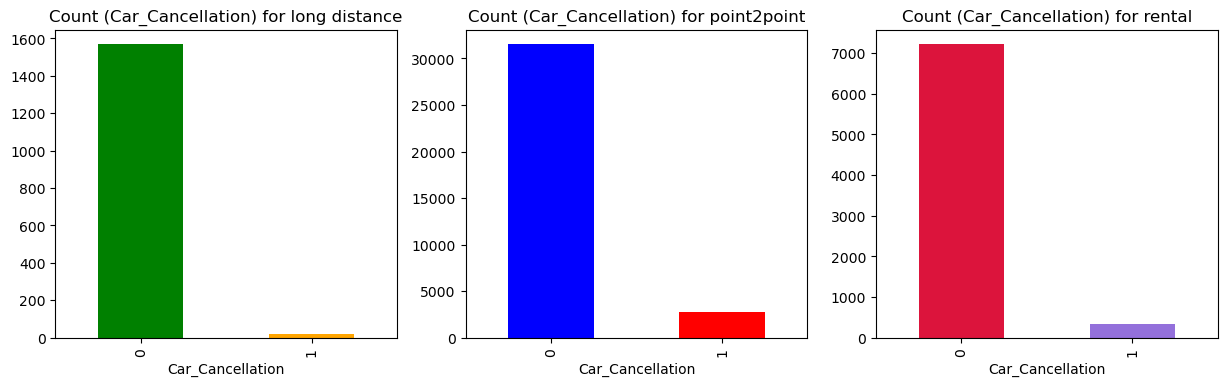

In [23]:
fig, ax = plt.subplots(1,3,figsize=(15,4))
target_count_long.plot(kind='bar',title='Count (Car_Cancellation) for long distance',color=['green','orange'],ax=ax[0]);
target_count_p2p.plot(kind='bar',title='Count (Car_Cancellation) for point2point',color=['blue','red'],ax=ax[1]);
target_count_rent.plot(kind='bar',title='Count (Car_Cancellation) for rental',color=['crimson','mediumpurple'],ax=ax[2]);

> From the above charts we can draw clear inference of data imbalance for Car_Cancellation classes.
To fix the imbalance we will be using Over-Sampling technique to curb the minority data.

> ## Splitting data and applying Logistic Regression

> * __For Long Distance__

In [24]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')

In [25]:
X = yC_long.drop(columns='Car_Cancellation')
y = yC_long.Car_Cancellation

In [26]:
X_long, y_long = smote.fit_resample(X, y)

In [27]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_predict, cross_val_score, cross_validate
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=40)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [28]:
# Using Cross_validation
print(cross_val_score(log_reg,X_long,y_long,cv=20).mean())

0.8184550057161524


In [29]:
# Using Train_Test split
X_train, X_test, y_train, y_test = train_test_split(X_long,y_long)

In [30]:
# # Tuning HyperParameters
# grid = {"C":np.logspace(-3,3,7)}
# log_reg_cv = GridSearchCV(log_reg,grid,cv=10,error_score='raise')
# log_reg_cv.fit(X_train,y_train)
# print("Tuned Parameters", log_reg_cv.best_params_)
# print("Accuracy", log_reg_cv.best_score_)

In [31]:
log_reg = LogisticRegression(random_state=40,C=1.0)

In [32]:
log_reg.fit(X_train,y_train)

LogisticRegression(random_state=40)

In [33]:
y_pred = log_reg.predict(X_test)

In [34]:
cnf_matrix = confusion_matrix(y_test,y_pred)
cnf_matrix

array([[290, 102],
       [ 40, 352]], dtype=int64)

In [35]:
acc_score_logistic_long = accuracy_score(y_test,y_pred)
acc_score_logistic_long

0.8188775510204082

In [36]:
print(classification_report(y_test,y_pred,target_names=['Not cancelled','Cancelled']))

               precision    recall  f1-score   support

Not cancelled       0.88      0.74      0.80       392
    Cancelled       0.78      0.90      0.83       392

     accuracy                           0.82       784
    macro avg       0.83      0.82      0.82       784
 weighted avg       0.83      0.82      0.82       784



> * __For Point2Point Distance__

In [37]:
X = yC_p2p.drop(columns='Car_Cancellation')
y = yC_p2p.Car_Cancellation

In [38]:
X_p2p, y_p2p = smote.fit_resample(X, y)

In [39]:
# Using Cross_validation
print(cross_val_score(log_reg,X_p2p,y_p2p,cv=20).mean())

0.713707275266735


In [40]:
# Using Train_Test split
X_train, X_test, y_train, y_test = train_test_split(X_p2p,y_p2p)

In [41]:
log_reg.fit(X_train,y_train)

LogisticRegression(random_state=40)

In [42]:
y_pred = log_reg.predict(X_test)

In [43]:
cnf_matrix = confusion_matrix(y_test,y_pred)
cnf_matrix

array([[5701, 2195],
       [2218, 5645]], dtype=int64)

In [44]:
acc_score_logistic_p2p = accuracy_score(y_test,y_pred)
acc_score_logistic_p2p

0.719969541214544

In [45]:
print(classification_report(y_test,y_pred,target_names=['Not cancelled','Cancelled']))

               precision    recall  f1-score   support

Not cancelled       0.72      0.72      0.72      7896
    Cancelled       0.72      0.72      0.72      7863

     accuracy                           0.72     15759
    macro avg       0.72      0.72      0.72     15759
 weighted avg       0.72      0.72      0.72     15759



> * __For Rental Distance__

In [46]:
X = yC_rent.drop(columns='Car_Cancellation')
y = yC_rent.Car_Cancellation

In [47]:
X_rent, y_rent = smote.fit_resample(X, y)

In [48]:
# Using Cross_validation
print(cross_val_score(log_reg,X_rent,y_rent,cv=20).mean())

0.6600056285322402


In [49]:
# Using Train_Test split
X_train, X_test, y_train, y_test = train_test_split(X_rent,y_rent)

In [50]:
log_reg.fit(X_train,y_train)

LogisticRegression(random_state=40)

In [51]:
y_pred = log_reg.predict(X_test)

In [52]:
cnf_matrix = confusion_matrix(y_test,y_pred)
cnf_matrix

array([[1269,  528],
       [ 699, 1111]], dtype=int64)

In [53]:
acc_score_logistic_rent = accuracy_score(y_test,y_pred)
acc_score_logistic_rent

0.6598281120044358

In [54]:
print(classification_report(y_test,y_pred,target_names=['Not cancelled','Cancelled']))

               precision    recall  f1-score   support

Not cancelled       0.64      0.71      0.67      1797
    Cancelled       0.68      0.61      0.64      1810

     accuracy                           0.66      3607
    macro avg       0.66      0.66      0.66      3607
 weighted avg       0.66      0.66      0.66      3607



> ## Splitting data and applying DecisionTreeClassifier

> * __For Long Distance__

In [55]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(random_state=40)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X_long,y_long)

In [57]:
# # Tuning HyperParameters
# grid = {"criterion":['gini','entropy'], "max_depth":np.arange(1,50,2),"min_samples_split":np.arange(2,10)}
# dt_clf_cv = GridSearchCV(dt_clf,grid,cv=10,error_score='raise')
# dt_clf_cv.fit(X_train,y_train)
# print("Tuned Parameters", dt_clf_cv.best_params_)
# print("Accuracy", dt_clf_cv.best_score_)

In [58]:
dt_clf = DecisionTreeClassifier(max_depth=19,min_samples_split=5)

In [59]:
dt_clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=19, min_samples_split=5)

In [60]:
y_pred = dt_clf.predict(X_test)

In [61]:
cnf_matrix = confusion_matrix(y_test,y_pred)
cnf_matrix

array([[367,  17],
       [ 12, 388]], dtype=int64)

In [62]:
acc_score_DT_long = accuracy_score(y_test,y_pred)
acc_score_DT_long

0.9630102040816326

In [63]:
print(classification_report(y_test,y_pred,target_names=['Not cancelled','Cancelled']))

               precision    recall  f1-score   support

Not cancelled       0.97      0.96      0.96       384
    Cancelled       0.96      0.97      0.96       400

     accuracy                           0.96       784
    macro avg       0.96      0.96      0.96       784
 weighted avg       0.96      0.96      0.96       784



> * __For Point2Point Distance__

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X_p2p,y_p2p)

In [65]:
dt_clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=19, min_samples_split=5)

In [66]:
y_pred = dt_clf.predict(X_test)

In [67]:
cnf_matrix = confusion_matrix(y_test,y_pred)
cnf_matrix

array([[7083,  811],
       [ 597, 7268]], dtype=int64)

In [68]:
acc_score_DT_p2p = accuracy_score(y_test,y_pred)
acc_score_DT_p2p

0.9106542293292722

In [69]:
print(classification_report(y_test,y_pred,target_names=['Not cancelled','Cancelled']))

               precision    recall  f1-score   support

Not cancelled       0.92      0.90      0.91      7894
    Cancelled       0.90      0.92      0.91      7865

     accuracy                           0.91     15759
    macro avg       0.91      0.91      0.91     15759
 weighted avg       0.91      0.91      0.91     15759



> * __For Rental Distance__

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X_rent,y_rent)

In [71]:
dt_clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=19, min_samples_split=5)

In [72]:
y_pred = dt_clf.predict(X_test)

In [73]:
cnf_matrix = confusion_matrix(y_test,y_pred)
cnf_matrix

array([[1633,  120],
       [  95, 1759]], dtype=int64)

In [74]:
acc_score_DT_rent = accuracy_score(y_test,y_pred)
acc_score_DT_rent

0.9403936789575825

In [75]:
print(classification_report(y_test,y_pred,target_names=['Not cancelled','Cancelled']))

               precision    recall  f1-score   support

Not cancelled       0.95      0.93      0.94      1753
    Cancelled       0.94      0.95      0.94      1854

     accuracy                           0.94      3607
    macro avg       0.94      0.94      0.94      3607
 weighted avg       0.94      0.94      0.94      3607



> ## Splitting data and applying RandomForestClassifier

> * __For Long Distance__

In [76]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=40)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X_long,y_long)

In [78]:
# # Tuning HyperParameters
# grid = {"criterion":['gini','entropy'], "max_depth":np.arange(1,50,2),"min_samples_split":np.arange(2,10)}
# rf_clf_cv = GridSearchCV(rf_clf,grid,cv=10,error_score='raise')
# rf_clf_cv.fit(X_train,y_train)
# print("Tuned Parameters", rf_clf_cv.best_params_)
# print("Accuracy", rf_clf_cv.best_score_)

In [79]:
rf_clf = RandomForestClassifier(criterion='entropy',max_depth=19,min_samples_split=2,oob_score=True)

In [80]:
rf_clf.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=19, oob_score=True)

In [81]:
y_pred = rf_clf.predict(X_test)

In [82]:
cnf_matrix = confusion_matrix(y_test,y_pred)
cnf_matrix

array([[370,   7],
       [  6, 401]], dtype=int64)

In [83]:
acc_score_RF_long = accuracy_score(y_test,y_pred)
acc_score_RF_long

0.9834183673469388

In [84]:
print(classification_report(y_test,y_pred,target_names=['Not cancelled','Cancelled']))

               precision    recall  f1-score   support

Not cancelled       0.98      0.98      0.98       377
    Cancelled       0.98      0.99      0.98       407

     accuracy                           0.98       784
    macro avg       0.98      0.98      0.98       784
 weighted avg       0.98      0.98      0.98       784



> * __For Point2Point Distance__

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X_p2p,y_p2p)

In [86]:
rf_clf.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=19, oob_score=True)

In [87]:
y_pred = rf_clf.predict(X_test)

In [88]:
cnf_matrix = confusion_matrix(y_test,y_pred)
cnf_matrix

array([[7253,  590],
       [ 341, 7575]], dtype=int64)

In [89]:
acc_score_RF_p2p = accuracy_score(y_test,y_pred)
acc_score_RF_p2p

0.9409226473761025

In [90]:
print(classification_report(y_test,y_pred,target_names=['Not cancelled','Cancelled']))

               precision    recall  f1-score   support

Not cancelled       0.96      0.92      0.94      7843
    Cancelled       0.93      0.96      0.94      7916

     accuracy                           0.94     15759
    macro avg       0.94      0.94      0.94     15759
 weighted avg       0.94      0.94      0.94     15759



> * __For Rental Distance__

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X_rent,y_rent)

In [92]:
rf_clf.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=19, oob_score=True)

In [93]:
y_pred = rf_clf.predict(X_test)

In [94]:
cnf_matrix = confusion_matrix(y_test,y_pred)
cnf_matrix

array([[1683,  108],
       [  94, 1722]], dtype=int64)

In [95]:
acc_score_RF_rent = accuracy_score(y_test,y_pred)
acc_score_RF_rent

0.9439977820903798

In [96]:
print(classification_report(y_test,y_pred,target_names=['Not cancelled','Cancelled']))

               precision    recall  f1-score   support

Not cancelled       0.95      0.94      0.94      1791
    Cancelled       0.94      0.95      0.94      1816

     accuracy                           0.94      3607
    macro avg       0.94      0.94      0.94      3607
 weighted avg       0.94      0.94      0.94      3607



> ## Splitting data and applying AdaBoost

> * __For Long Distance__

In [97]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
ab_clf = AdaBoostClassifier(random_state=40)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X_long,y_long)

In [99]:
# # Tuning HyperParameters
# grid = {"learning_rate":[0.01,1.0],'n_estimators':np.arange(50,110,10),'algorithm':['SAMME','SAMME.R']}
# ab_clf_cv = GridSearchCV(ab_clf,grid,cv=10,error_score='raise')
# ab_clf_cv.fit(X_train,y_train)
# print("Tuned Parameters", ab_clf_cv.best_params_)
# print("Accuracy", ab_clf_cv.best_score_)

In [100]:
ab_clf = AdaBoostClassifier(random_state=40,learning_rate=1,n_estimators=100)

In [101]:
ab_clf.fit(X_train,y_train)

AdaBoostClassifier(learning_rate=1, n_estimators=100, random_state=40)

In [102]:
y_pred = ab_clf.predict(X_test)

In [103]:
cnf_matrix = confusion_matrix(y_test,y_pred)
cnf_matrix

array([[393,  28],
       [ 22, 341]], dtype=int64)

In [104]:
acc_score_AB_long = accuracy_score(y_test,y_pred)
acc_score_AB_long

0.9362244897959183

In [105]:
print(classification_report(y_test,y_pred,target_names=['Not cancelled','Cancelled']))

               precision    recall  f1-score   support

Not cancelled       0.95      0.93      0.94       421
    Cancelled       0.92      0.94      0.93       363

     accuracy                           0.94       784
    macro avg       0.94      0.94      0.94       784
 weighted avg       0.94      0.94      0.94       784



> * __For Point2Point Distance__

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X_p2p,y_p2p)

In [107]:
ab_clf.fit(X_train,y_train)

AdaBoostClassifier(learning_rate=1, n_estimators=100, random_state=40)

In [108]:
y_pred = ab_clf.predict(X_test)

In [109]:
cnf_matrix = confusion_matrix(y_test,y_pred)
cnf_matrix

array([[6386, 1424],
       [1324, 6625]], dtype=int64)

In [110]:
acc_score_AB_p2p = accuracy_score(y_test,y_pred)
acc_score_AB_p2p

0.825623453264801

In [111]:
print(classification_report(y_test,y_pred,target_names=['Not cancelled','Cancelled']))

               precision    recall  f1-score   support

Not cancelled       0.83      0.82      0.82      7810
    Cancelled       0.82      0.83      0.83      7949

     accuracy                           0.83     15759
    macro avg       0.83      0.83      0.83     15759
 weighted avg       0.83      0.83      0.83     15759



> * __For Rental Distance__

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X_rent,y_rent)

In [113]:
ab_clf.fit(X_train,y_train)

AdaBoostClassifier(learning_rate=1, n_estimators=100, random_state=40)

In [114]:
y_pred = ab_clf.predict(X_test)

In [115]:
cnf_matrix = confusion_matrix(y_test,y_pred)
cnf_matrix

array([[1447,  380],
       [ 276, 1504]], dtype=int64)

In [116]:
acc_score_AB_rent = accuracy_score(y_test,y_pred)
acc_score_AB_rent

0.8181314111449959

In [117]:
print(classification_report(y_test,y_pred,target_names=['Not cancelled','Cancelled']))

               precision    recall  f1-score   support

Not cancelled       0.84      0.79      0.82      1827
    Cancelled       0.80      0.84      0.82      1780

     accuracy                           0.82      3607
    macro avg       0.82      0.82      0.82      3607
 weighted avg       0.82      0.82      0.82      3607



> ## Splitting data and applying Gradient Boosting

> * __For Long Distance__

In [118]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
xg_clf = GradientBoostingClassifier(random_state=40)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X_long,y_long)

In [120]:
# # Tuning HyperParameters
# grid = {'loss':['log_loss', 'exponential'],"learning_rate":[0.01,1.0],'criterion':['friedman_mse', 'squared_error'],
#         "max_depth":np.arange(1,50,2),"min_samples_split":np.arange(2,10),'min_samples_leaf':np.arange(2,20,2),
#         'algorithm':['SAMME','SAMME.R']}
# xg_clf_cv = GridSearchCV(xg_clf,grid,cv=10,error_score='raise')
# xg_clf_cv.fit(X_train,y_train)
# print("Tuned Parameters", xg_clf_cv.best_params_)
# print("Accuracy", xg_clf_cv.best_score_)

In [121]:
xg_clf = AdaBoostClassifier(random_state=40,learning_rate=1,n_estimators=100)

In [122]:
xg_clf.fit(X_train,y_train)

AdaBoostClassifier(learning_rate=1, n_estimators=100, random_state=40)

In [123]:
y_pred = xg_clf.predict(X_test)

In [124]:
cnf_matrix = confusion_matrix(y_test,y_pred)
cnf_matrix

array([[360,  25],
       [ 16, 383]], dtype=int64)

In [125]:
acc_score_XG_long = accuracy_score(y_test,y_pred)
acc_score_XG_long

0.9477040816326531

In [126]:
print(classification_report(y_test,y_pred,target_names=['Not cancelled','Cancelled']))

               precision    recall  f1-score   support

Not cancelled       0.96      0.94      0.95       385
    Cancelled       0.94      0.96      0.95       399

     accuracy                           0.95       784
    macro avg       0.95      0.95      0.95       784
 weighted avg       0.95      0.95      0.95       784



> * __For Point2Point Distance__

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X_p2p,y_p2p)

In [128]:
xg_clf.fit(X_train,y_train)

AdaBoostClassifier(learning_rate=1, n_estimators=100, random_state=40)

In [129]:
y_pred = xg_clf.predict(X_test)

In [130]:
cnf_matrix = confusion_matrix(y_test,y_pred)
cnf_matrix

array([[6278, 1547],
       [1355, 6579]], dtype=int64)

In [131]:
acc_score_XG_p2p = accuracy_score(y_test,y_pred)
acc_score_XG_p2p

0.8158512595976902

In [132]:
print(classification_report(y_test,y_pred,target_names=['Not cancelled','Cancelled']))

               precision    recall  f1-score   support

Not cancelled       0.82      0.80      0.81      7825
    Cancelled       0.81      0.83      0.82      7934

     accuracy                           0.82     15759
    macro avg       0.82      0.82      0.82     15759
 weighted avg       0.82      0.82      0.82     15759



> * __For Rental Distance__

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X_rent,y_rent)

In [134]:
xg_clf.fit(X_train,y_train)

AdaBoostClassifier(learning_rate=1, n_estimators=100, random_state=40)

In [135]:
y_pred = xg_clf.predict(X_test)

In [136]:
cnf_matrix = confusion_matrix(y_test,y_pred)
cnf_matrix

array([[1421,  371],
       [ 288, 1527]], dtype=int64)

In [137]:
acc_score_XG_rent = accuracy_score(y_test,y_pred)
acc_score_XG_rent

0.8172996950374273

In [138]:
print(classification_report(y_test,y_pred,target_names=['Not cancelled','Cancelled']))

               precision    recall  f1-score   support

Not cancelled       0.83      0.79      0.81      1792
    Cancelled       0.80      0.84      0.82      1815

     accuracy                           0.82      3607
    macro avg       0.82      0.82      0.82      3607
 weighted avg       0.82      0.82      0.82      3607



> ## Splitting data and applying Naive Bayes

> * __For Long Distance__

In [139]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import GaussianNB
naive_clf = GaussianNB()
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [140]:
X_train, X_test, y_train, y_test = train_test_split(X_long,y_long)

In [141]:
naive_clf.fit(X_train,y_train)

GaussianNB()

In [142]:
y_pred = naive_clf.predict(X_test)

In [143]:
cnf_matrix = confusion_matrix(y_test,y_pred)
cnf_matrix

array([[ 78, 307],
       [  0, 399]], dtype=int64)

In [144]:
acc_score_naive_long = accuracy_score(y_test,y_pred)
acc_score_naive_long

0.6084183673469388

In [145]:
print(classification_report(y_test,y_pred,target_names=['Not cancelled','Cancelled']))

               precision    recall  f1-score   support

Not cancelled       1.00      0.20      0.34       385
    Cancelled       0.57      1.00      0.72       399

     accuracy                           0.61       784
    macro avg       0.78      0.60      0.53       784
 weighted avg       0.78      0.61      0.53       784



> * __For Point2Point Distance__

In [146]:
X_train, X_test, y_train, y_test = train_test_split(X_p2p,y_p2p)

In [147]:
naive_clf.fit(X_train,y_train)

GaussianNB()

In [148]:
y_pred = naive_clf.predict(X_test)

In [149]:
cnf_matrix = confusion_matrix(y_test,y_pred)
cnf_matrix

array([[5256, 2639],
       [1736, 6128]], dtype=int64)

In [150]:
acc_score_naive_p2p = accuracy_score(y_test,y_pred)
acc_score_naive_p2p

0.7223808617298052

In [151]:
print(classification_report(y_test,y_pred,target_names=['Not cancelled','Cancelled']))

               precision    recall  f1-score   support

Not cancelled       0.75      0.67      0.71      7895
    Cancelled       0.70      0.78      0.74      7864

     accuracy                           0.72     15759
    macro avg       0.73      0.72      0.72     15759
 weighted avg       0.73      0.72      0.72     15759



> * __For Rental Distance__

In [152]:
X_train, X_test, y_train, y_test = train_test_split(X_rent,y_rent)

In [153]:
naive_clf.fit(X_train,y_train)

GaussianNB()

In [154]:
y_pred = naive_clf.predict(X_test)

In [155]:
cnf_matrix = confusion_matrix(y_test,y_pred)
cnf_matrix

array([[1410,  397],
       [ 827,  973]], dtype=int64)

In [156]:
acc_score_naive_rent = accuracy_score(y_test,y_pred)
acc_score_naive_rent

0.6606598281120044

In [157]:
print(classification_report(y_test,y_pred,target_names=['Not cancelled','Cancelled']))

               precision    recall  f1-score   support

Not cancelled       0.63      0.78      0.70      1807
    Cancelled       0.71      0.54      0.61      1800

     accuracy                           0.66      3607
    macro avg       0.67      0.66      0.66      3607
 weighted avg       0.67      0.66      0.66      3607



> ## Splitting data and applying SVC Classifier

> * __For Long Distance__

In [158]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
svc_clf = SVC()
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [159]:
X_train, X_test, y_train, y_test = train_test_split(X_long,y_long)

In [160]:
# # Tuning HyperParameters
# grid = {'C':np.arange(1,6),"kernel":['linear', 'poly', 'rbf', 'sigmoid']}
# svc_clf_cv = GridSearchCV(svc_clf,grid,cv=10,error_score='raise')
# svc_clf_cv.fit(X_train,y_train)
# print("Tuned Parameters", svc_clf_cv.best_params_)
# print("Accuracy", svc_clf_cv.best_score_)

In [161]:
svc_clf = SVC(C=5,kernel='rbf')

In [162]:
svc_clf.fit(X_train,y_train)

SVC(C=5)

In [163]:
y_pred = svc_clf.predict(X_test)

In [164]:
cnf_matrix = confusion_matrix(y_test,y_pred)
cnf_matrix

array([[347,  61],
       [ 14, 362]], dtype=int64)

In [165]:
acc_score_svc_long = accuracy_score(y_test,y_pred)
acc_score_svc_long

0.9043367346938775

In [166]:
print(classification_report(y_test,y_pred,target_names=['Not cancelled','Cancelled']))

               precision    recall  f1-score   support

Not cancelled       0.96      0.85      0.90       408
    Cancelled       0.86      0.96      0.91       376

     accuracy                           0.90       784
    macro avg       0.91      0.91      0.90       784
 weighted avg       0.91      0.90      0.90       784



> * __For Point2Point Distance__

In [167]:
X_train, X_test, y_train, y_test = train_test_split(X_p2p,y_p2p)

In [168]:
svc_clf.fit(X_train,y_train)

SVC(C=5)

In [169]:
y_pred = svc_clf.predict(X_test)

In [170]:
cnf_matrix = confusion_matrix(y_test,y_pred)
cnf_matrix

array([[5905, 2038],
       [1291, 6525]], dtype=int64)

In [171]:
acc_score_svc_p2p = accuracy_score(y_test,y_pred)
acc_score_svc_p2p

0.7887556317025192

In [172]:
print(classification_report(y_test,y_pred,target_names=['Not cancelled','Cancelled']))

               precision    recall  f1-score   support

Not cancelled       0.82      0.74      0.78      7943
    Cancelled       0.76      0.83      0.80      7816

     accuracy                           0.79     15759
    macro avg       0.79      0.79      0.79     15759
 weighted avg       0.79      0.79      0.79     15759



> * __For Rental Distance__

In [173]:
X_train, X_test, y_train, y_test = train_test_split(X_rent,y_rent)

In [174]:
svc_clf.fit(X_train,y_train)

SVC(C=5)

In [175]:
y_pred = svc_clf.predict(X_test)

In [176]:
cnf_matrix = confusion_matrix(y_test,y_pred)
cnf_matrix

array([[1343,  446],
       [ 459, 1359]], dtype=int64)

In [177]:
acc_score_svc_rent = accuracy_score(y_test,y_pred)
acc_score_svc_rent

0.7490989742168007

In [178]:
print(classification_report(y_test,y_pred,target_names=['Not cancelled','Cancelled']))

               precision    recall  f1-score   support

Not cancelled       0.75      0.75      0.75      1789
    Cancelled       0.75      0.75      0.75      1818

     accuracy                           0.75      3607
    macro avg       0.75      0.75      0.75      3607
 weighted avg       0.75      0.75      0.75      3607



> ## Splitting data and applying K-Nearest Neighbour

> * __For Long Distance__

In [179]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
k_clf = KNeighborsClassifier()
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [180]:
X_train, X_test, y_train, y_test = train_test_split(X_long,y_long)

In [181]:
# Tuning HyperParameters
grid = {'n_neighbors':np.arange(1,10)}
k_clf_cv = GridSearchCV(k_clf,grid,cv=10,error_score='raise')
k_clf_cv.fit(X_train,y_train)
print("Tuned Parameters", k_clf_cv.best_params_)
print("Accuracy", k_clf_cv.best_score_)

Tuned Parameters {'n_neighbors': 1}
Accuracy 0.9651298232960691


In [182]:
k_clf = KNeighborsClassifier(n_neighbors=1)

In [183]:
k_clf.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [184]:
y_pred = k_clf.predict(X_test)

In [185]:
cnf_matrix = confusion_matrix(y_test,y_pred)
cnf_matrix

array([[379,  21],
       [  7, 377]], dtype=int64)

In [186]:
acc_score_k_long = accuracy_score(y_test,y_pred)
acc_score_k_long

0.9642857142857143

In [187]:
print(classification_report(y_test,y_pred,target_names=['Not cancelled','Cancelled']))

               precision    recall  f1-score   support

Not cancelled       0.98      0.95      0.96       400
    Cancelled       0.95      0.98      0.96       384

     accuracy                           0.96       784
    macro avg       0.96      0.96      0.96       784
 weighted avg       0.96      0.96      0.96       784



> * __For Point2Point Distance__

In [188]:
X_train, X_test, y_train, y_test = train_test_split(X_p2p,y_p2p)

In [189]:
k_clf.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [190]:
y_pred = k_clf.predict(X_test)

In [191]:
cnf_matrix = confusion_matrix(y_test,y_pred)
cnf_matrix

array([[7053,  859],
       [ 137, 7710]], dtype=int64)

In [192]:
acc_score_k_p2p = accuracy_score(y_test,y_pred)
acc_score_k_p2p

0.9367980201789453

In [193]:
print(classification_report(y_test,y_pred,target_names=['Not cancelled','Cancelled']))

               precision    recall  f1-score   support

Not cancelled       0.98      0.89      0.93      7912
    Cancelled       0.90      0.98      0.94      7847

     accuracy                           0.94     15759
    macro avg       0.94      0.94      0.94     15759
 weighted avg       0.94      0.94      0.94     15759



> * __For Rental Distance__

In [194]:
X_train, X_test, y_train, y_test = train_test_split(X_rent,y_rent)

In [195]:
k_clf.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [196]:
y_pred = k_clf.predict(X_test)

In [197]:
cnf_matrix = confusion_matrix(y_test,y_pred)
cnf_matrix

array([[1705,  106],
       [ 266, 1530]], dtype=int64)

In [198]:
acc_score_k_rent = accuracy_score(y_test,y_pred)
acc_score_k_rent

0.8968672026614916

In [199]:
print(classification_report(y_test,y_pred,target_names=['Not cancelled','Cancelled']))

               precision    recall  f1-score   support

Not cancelled       0.87      0.94      0.90      1811
    Cancelled       0.94      0.85      0.89      1796

     accuracy                           0.90      3607
    macro avg       0.90      0.90      0.90      3607
 weighted avg       0.90      0.90      0.90      3607



### Summarizing the accuracy scores:

In [204]:
indx = pd.MultiIndex.from_product([['Logistic Regression','DecisionTree Classifier','RandomForest Classifier',
                                  'AdaptiveBoosting', 'GradientBoosting','Naive Bayes','SVM','K-Nearest Neighbour']])
col=['Long Distance','Point to Point','Hourly Rental']
values = [[acc_score_logistic_long,acc_score_logistic_p2p,acc_score_logistic_rent],
         [acc_score_DT_long,acc_score_DT_p2p,acc_score_DT_rent],
         [acc_score_RF_long,acc_score_RF_p2p,acc_score_RF_rent],
         [acc_score_AB_long,acc_score_AB_p2p,acc_score_AB_rent],
         [acc_score_XG_long,acc_score_XG_p2p,acc_score_XG_rent],
         [acc_score_naive_long,acc_score_naive_p2p,acc_score_naive_rent],
         [acc_score_svc_long,acc_score_svc_p2p,acc_score_svc_rent],
         [acc_score_k_long,acc_score_k_p2p,acc_score_k_rent]]

In [205]:
summary = pd.DataFrame(values,indx,col)
summary

,Long Distance,Point to Point,Hourly Rental
Logistic Regression,0.82,0.72,0.66
DecisionTree Classifier,0.96,0.91,0.94
RandomForest Classifier,0.98,0.94,0.94
AdaptiveBoosting,0.94,0.83,0.82
GradientBoosting,0.95,0.82,0.82
Naive Bayes,0.61,0.72,0.66
SVM,0.90,0.79,0.75
K-Nearest Neighbour,0.96,0.94,0.90


* ### As the given threshold is >= 75% and overfitting the model is not required, therefore any algorithm giving an accuracy within a range of >90% and <95% is selected.

> ### 1. Best algorithm for predicting Long Distance:

In [213]:
summary[(summary['Long Distance'] > 0.90) & (summary['Long Distance'] < 0.95)].index[0]

('AdaptiveBoosting',)

> ### 1. Best algorithm for predicting Point to Point:

In [219]:
summary[(summary['Point to Point'] > 0.90) & (summary['Point to Point'] < 0.95)].index[2]

('K-Nearest Neighbour',)

> ### 1. Best algorithm for predicting Hourly Rental:

In [220]:
summary[(summary['Hourly Rental'] > 0.90) & (summary['Hourly Rental'] < 0.95)].index[0]

('DecisionTree Classifier',)